Website Link: https://chriscallahan99.github.io/DataScience_Final_Project/ 

![usaid.jpg](docs/assets/usaid.jpg)    


<div style="text-align: center;">
<h1>How does US Foreign Aid Impact Health Indicators?</h1>  
<br>
By Chris Callahan and Mikey Sison
</div>


<div style="text-align: center;">
1. Introduction<br>
2. Data: Extraction, Transform and Load<br>
3. Exploratory Data Analysis<br>
4. <br>
5. <br>
6. Conclusion<br>
</div>


<div style="text-align: center;">
<h2>Introduction</h2>
</div>

### Abstract

The United States disburses the most foreign aid in the world ([World Economic Forum](https://www.weforum.org/agenda/2016/08/foreign-aid-these-countries-are-the-most-generous/ 'Foreign aid')) and it is of paramount importance that the countries who are in greatest need are able to get it. We examine US foreign aid disbursements to six countires of middle to low economic rank to determine the effect of monetary aid increases on five health indicators representative of overall health outcomes. The countries of Ethiopia, El Salvador, Ecuador, Haiti, Moldova, and Yemen represent a sample of countries exhibiting some of the greatest overall need for humanitarian aid. Geopolitical and environmental factors have rendered Ethiopia, Haiti, and Yemen dependent on foreign aid for humanitarian support. It is anecdotally acknowledged that overall increases in foreign aid disbursements would have a positive increase in overall welfare. We aim to determine which US Agencies have the greatest direct impact on improving health indicators. 
                
Our analysis will explore and answer the following questions:
* How does US foreign aid impact different countries? 
* Does a \$1 marginal dollar increase to one country increase health indicators more or less than different country? 
* Since US agencies have budgets set by Congress, how can they better utilize a limited budget with the maximum impact?
* Is change in an indicator dependent on marginal dollar increases per agency?
     
___

<div style="text-align: center;">
    <h2>Data: Extraction, Transform, and Load</h2>
</div>





### Imports
For this project, we utilized the python libraries pandas, maplotlib, numpy, and more. The first few code cells will be installing seaborn, a plotting library, and importing other necessary libraries.

In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
## IMPORTS ##

# Load Numpy
import numpy as np

# Load os
import os

# Load Pandas
import pandas as pd

# Load MatPlotLib
import matplotlib
import matplotlib.pyplot as plt

# Load Seaborn
import seaborn as sns; sns.set_theme()

# These two things are for Pandas, it widens the notebook and lets us display data easily.
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

Let's change the directory to the folder containing the foreign aid data.

In [3]:
os.chdir("Foreign-Aid-Country-Data")

### Data Sourcing & Extraction
We obtained data from two primary sources:  [US Gov Foreign Assistance](https://foreignassistance.gov/) and
[WHO GW13 Dataset](https://www.who.int/data/inequality-monitor/data#PageContent_C160_Col00). These two datasets contain the publicly avaliable US foreign aid disbursements per country and health indicators by country over the past 20 years, respectively.

#### Foreign Aid by Country

Our first dataset comes from the [US Foreign Assistance](https://foreignassistance.gov/) webpage. With this dataset, we will be focusing on quantifying the amount of foreign aid the United States gives to the six countries in question, per year, and which agencies provide this support. 

Analysis of this dataset will answer the following questions:
* How much does a country recieve from the US in foreign aid per year?
* How much aid is disbursed each year by agency?



#### Example Query
![FAgovEthiopiaQuery.png](docs/assets/FAgovEthiopiaQuery.png)

Figure 1: The image above is an example query of the foreign aid given to Ethiopia from 2018 to 2022


#### Obtaining the data
For each country, we created a query, similar to that of figure 1, obtaining the non-military foreign aid given from 2002 to 2022. Since we are examining how foreign aid impacts health, we assume that military foreign aid has no impact on the health outcomes of the country and will be removed from the dataframes. Each of these datasets can be found in the "Foreign-Aid-Country-Data" folder. 

### Reading in Country data (Loading)

Here, we are reading in the country data from our queries on ForeignAssistance.gov.  Each of the queries encompass non-military foreign aid from 2002 to 2022 fiscal years. 

We chose countries in low to middle income groups with one to two per continent/region and low military assistance.
* **Europe**: Moldova
* **Middle East**: Yemen
* **Africa**: Ethiopia
* **South America**: Ecuador
* **North/Central America**: El Salvador, Haiti


Let's read in our data into Pandas DataFrames.

In [5]:
Ethiopia_foreign_aid_data = pd.read_csv(os.path.join("Africa","Ethiopia_2022-2002_Econ_Other.csv"))
Moldova_foreign_aid_data = pd.read_csv(os.path.join("Europe", "Moldova_2022-2002_Econ_Other.csv"))
Yemen_foreign_aid_data = pd.read_csv(os.path.join("Middle-East","Yemen_2022-2002_Econ_Other.csv"))
Ecuador_foreign_aid_data = pd.read_csv(os.path.join("South-America","Ecuador_2022-2002_Econ_Other.csv"))
El_Salvador_foreign_aid_data = pd.read_csv(os.path.join("North-America","El_Salvador_2022-2002_Econ_Other.csv"))
Haiti_foreign_aid_data = pd.read_csv(os.path.join("North-America","Haiti_2022-2002_Econ_Other.csv"))

countries = [
             Ethiopia_foreign_aid_data,
             Moldova_foreign_aid_data,
             Yemen_foreign_aid_data, 
             Ecuador_foreign_aid_data, 
             El_Salvador_foreign_aid_data,
             Haiti_foreign_aid_data
            ] # For ease of looping

Ethiopia_foreign_aid_data.head(3)

,Country ID,Country Code,Country Name,Region ID,Region Name,Income Group ID,Income Group Name,Income Group Acronym,Managing Agency ID,Managing Agency Acronym,...,Activity Name,Activity Description,Activity Project Number,Activity Start Date,Activity End Date,Transaction Type ID,Transaction Type Name,Fiscal Year,Current Dollar Amount,Constant Dollar Amount
0,231,ETH,Ethiopia,5,Sub-Saharan Africa,1,Low Income Country,LIC,1,USAID,...,Title II Emergency Program,Title II Emergency Program through a partner o...,720BHA22CA00005,NaN,NaN,2,Obligations,2022,113052149,109155305
1,231,ETH,Ethiopia,5,Sub-Saharan Africa,1,Low Income Country,LIC,1,USAID,...,Emergency food assistance,Emergency humanitarian food and nutirition ass...,720BHA22IO00038,NaN,2023-03-09,2,Obligations,2022,77740000,75060346
2,231,ETH,Ethiopia,5,Sub-Saharan Africa,1,Low Income Country,LIC,1,USAID,...,Title II Emergency Program,Title II Emergency Program through a partner o...,720BHA22IO00034,NaN,NaN,2,Obligations,2022,57420571,55441315


#### Focus Areas
We will be focusing on the country-specific datasets from the ForeignAssistance.gov website. Each row in the summary describes a country and the fiscal year. Each entity contains data on the transaction type, Transaction Type, Fiscal Year, current amount (in USD), and constant amount (in USD). We are planning on using this data from the summary as a reference to determine how much money is irrelevant to our study (non-military/defense spending).

#### Extraneous Columns
As you can see, there are 51 columns in the DataFrame. Many of these columns are redundant or irrelevant to our analysis. Below, we will remove these columns, maintaining the interesting features of the dataset. 


In [6]:
columns_to_drop = ['Transaction Type ID',
        'Foreign Assistance Objective ID',
        'Implementing Partner Category ID',
        'Implementing Partner Category Name',
        'Implementing Partner Sub-category ID',
        'Implementing Partner Sub-category Name', 
        'Implementing Partner ID',
        'Implementing Partner Name', 
        'International Category ID',
        'International Category Name',
        'International Sector Code',
        'International Sector Name', 
        'International Purpose Code',
        'Managing Agency ID',
        'Managing Sub-agency or Bureau ID',
        'Activity Project Number',
        'Managing Sub-agency or Bureau Name',
        'Aid Type Group ID',
        'Funding Agency ID',
        'Submission ID', 
        'Funding Acount ID',
        'Activity ID',
        'Income Group Acronym',
        'Managing Sub-agency or Bureau Acronym',
        'US Category ID',
        'US Category Name',
    ]


for country in countries:
    for col in columns_to_drop:
        country.drop(labels= col, axis= 'columns', inplace= True)

Ethiopia_foreign_aid_data.columns

Index(['Country ID', 'Country Code', 'Country Name', 'Region ID',
       'Region Name', 'Income Group ID', 'Income Group Name',
       'Managing Agency Acronym', 'Managing Agency Name',
       'International Purpose Name', 'US Sector ID', 'US Sector Name',
       'Funding Account Name', 'Funding Agency Name', 'Funding Agency Acronym',
       'Foreign Assistance Objective Name', 'Aid Type Group Name',
       'Activity Name', 'Activity Description', 'Activity Start Date',
       'Activity End Date', 'Transaction Type Name', 'Fiscal Year',
       'Current Dollar Amount', 'Constant Dollar Amount'],
      dtype='object')

#### Income Analysis
Next, we want to highlight the income of each of the countries to verify that the countries chosen are likely to receive a sizeable amount and diverse range of US foreign aid. 

In [7]:
for country in countries:
    display(country['Country Name'][0] + ': '+ country['Income Group Name'][0])

'Ethiopia: Low Income Country'

'Moldova: Lower Middle Income Country'

'Yemen: Low Income Country'

'Ecuador: Upper Middle Income Country'

'El Salvador: Lower Middle Income Country'

'Haiti: Low Income Country'

As we can see, most of these countries fall into the low / middle income countries. We will see that, with the exception of Yemen, all of these countries receive roughly the same amount of foreign aid.

#### Removing Military Aid & Negative Amounts
Before we visuallize the aid amounts, we want to get rid of entries / aid projects that come from military sources since they would not have impacts on any health metrics we are interested in.

In [8]:
# Drop rows unrelated to economic/health development
for i, country in enumerate(countries):
    country.drop(country[country["Managing Agency Name"] == 'Department of Defense'].index, inplace = True)
    country.drop(country[country["Managing Agency Name"] == 'Department of Homeland Security'].index, inplace = True)
    country.drop(country[country["Managing Agency Name"] == 'Department of Justice'].index, inplace = True)
    country.drop(country[country["Managing Agency Name"] == 'Department of the Army'].index, inplace = True)
    country.drop(country[country["Managing Agency Name"] == 'Department of the Interior'].index, inplace = True)
    
    # Drop row if dollar amount is less than 0 as this is usually a redaction of funds
    country.drop(country[country["Constant Dollar Amount"] < 0 ].index, inplace = True)


### Visualizing Total Foreign Aid Given by Year

First, we're going to quickly make another column for the purpose of scaling the data. Let's plot the amount of foreign aid received by country. This exploration will help us determine which of the countries chosen recieve the most aid. Make sure to pay attention to the axis labels! 

In [105]:
for country in countries:
    country['Constant Dollar Amount ($1,000,000s)'] = country['Constant Dollar Amount']
    country['Constant Dollar Amount ($1,000,000s)'] = country['Constant Dollar Amount ($1,000,000s)'].apply(lambda x: x / 1000000)
    
    country['Year Abv.'] = country['Fiscal Year']
    country['Year Abv.'] = country['Year Abv.'].apply(lambda x: int(str(x)[2:]))

In [106]:
# Get the top 5 agencies by money spent 

country_by_fiscal_yr = []
for i, country  in enumerate(countries): 
    # Groupby funding agency to get money spent per agency.
    country_by_fiscal_yr.append(pd.DataFrame(country.groupby('Year Abv.')['Constant Dollar Amount ($1,000,000s)'].sum()))    
    country_by_fiscal_yr[i].reset_index(inplace=True) # Reset index for plotting
    
# 0: Ethiopia
# 1: Moldova
# 2: Yemen
# 3: Ecuador
# 4: El Salvador
# 5: Haiti


Text(0.5, 1.0, 'El Salvador')

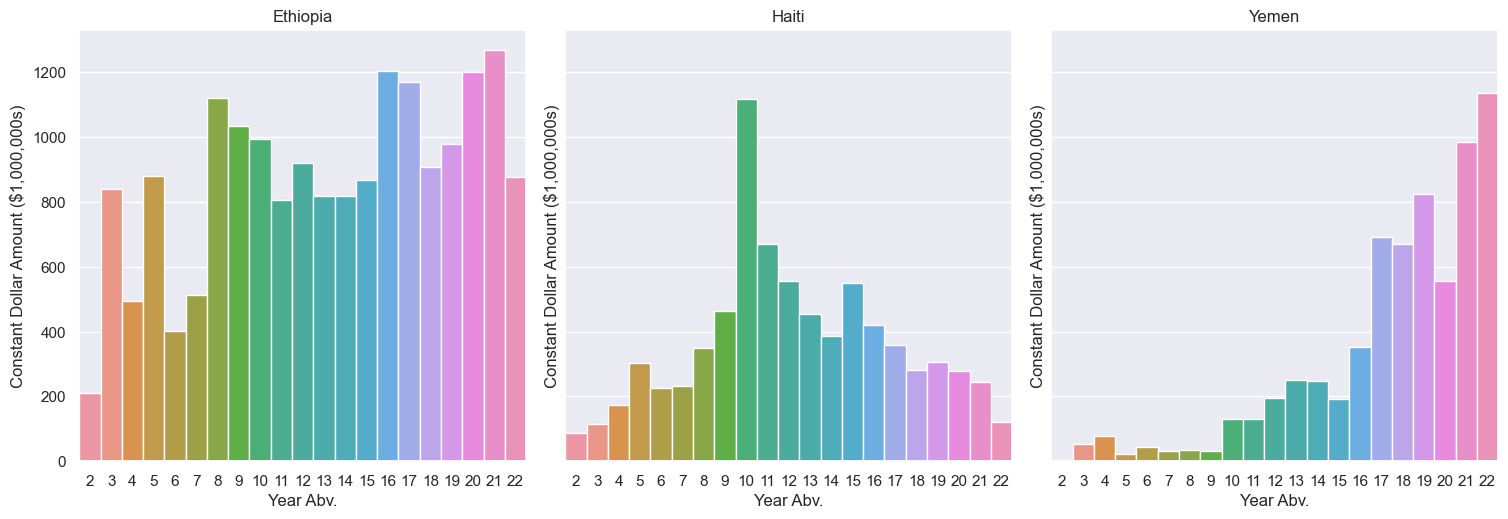

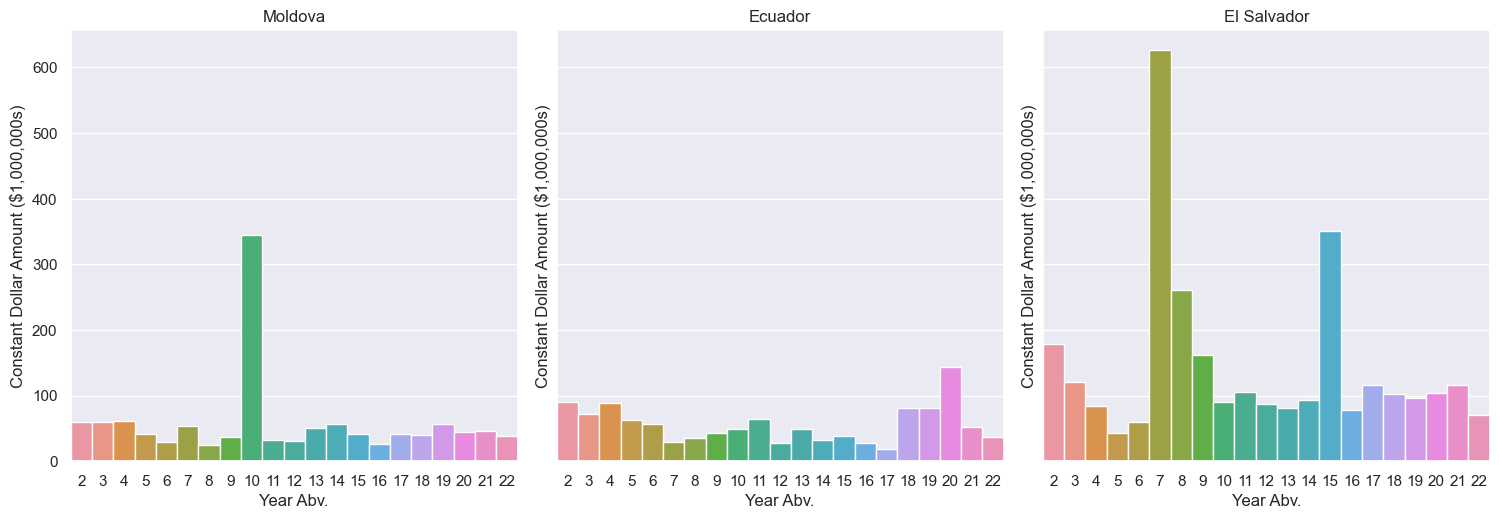

In [108]:
fig1, axes1 = plt.subplots(1, 3, figsize=(15,5) , sharey= True)
fig1.tight_layout(h_pad= 5)
#axes1[0,0].set(ylim=(0, 0.5))

sns.barplot(country_by_fiscal_yr[0], x= 'Year Abv.', y= 'Constant Dollar Amount ($1,000,000s)', ax= axes1[0], width= 1, errorbar= None).set_title('Ethiopia')
sns.barplot(country_by_fiscal_yr[5], x= 'Year Abv.', y= 'Constant Dollar Amount ($1,000,000s)', ax= axes1[1], width= 1, errorbar= None).set_title('Haiti')
sns.barplot(country_by_fiscal_yr[2], x= 'Year Abv.', y= 'Constant Dollar Amount ($1,000,000s)', ax= axes1[2], width= 1, errorbar= None).set_title('Yemen')


fig2, axes2 = plt.subplots(1, 3, figsize=(15,5) , sharey= True)
fig2.tight_layout(h_pad= 5)

sns.barplot(country_by_fiscal_yr[1], x= 'Year Abv.', y= 'Constant Dollar Amount ($1,000,000s)', ax= axes2[0], width= 1, errorbar= None).set_title('Moldova')
sns.barplot(country_by_fiscal_yr[3], x= 'Year Abv.', y= 'Constant Dollar Amount ($1,000,000s)', ax= axes2[1], width= 1, errorbar= None).set_title('Ecuador')
sns.barplot(country_by_fiscal_yr[4], x= 'Year Abv.', y= 'Constant Dollar Amount ($1,000,000s)', ax= axes2[2], width= 1, errorbar= None).set_title('El Salvador')


Graph 1: Constant Dollar Amount in $1,000,000 of Foreign Aid by Fiscal Year. The countries are separated in groups of 3 for scale purposes.

#### Analysis of Foreign Aid Amounts
The countries chosen represent two distinct groups. One group that receives a vary large amount of foreign aid and one that receives less, but still a significant amount of aid. There is a noticable upward trend in Ethiopia and a peak in Haiti around 2010. The upward trend in Ethiopia is most likely due to a combination of drought, famine, and a civil war starting in 2020. Similarly, Yemen receives the a large amount of US aid in recent years due to the ourbreak of the Yemeni Civil War in late 2014, demarking the upward trend.

### Visualizing Foreign Aid by Agency
Next, let's examine which agencies give the most aid. This will allow us to determine which category, health or economic, the country receives the most aid in. 

In [126]:
# Get the top 5 agencies by money spent 

country_by_funding_agency = []
for i, country  in enumerate(countries):
    # Groupby funding agency to get money spent per agency.
    country_by_funding_agency.append(pd.DataFrame(country.groupby('Funding Agency Acronym')['Constant Dollar Amount ($1,000,000s)'].sum()))
    country_by_funding_agency[i].reset_index(inplace=True) # Reset index for plotting
    
    # Sort and locate the top 3 agencies by money spent
    country_by_funding_agency[i] = country_by_funding_agency[i].sort_values(ascending= False, by= 'Constant Dollar Amount ($1,000,000s)')
    country_by_funding_agency[i] = country_by_funding_agency[i].iloc[0:3] 

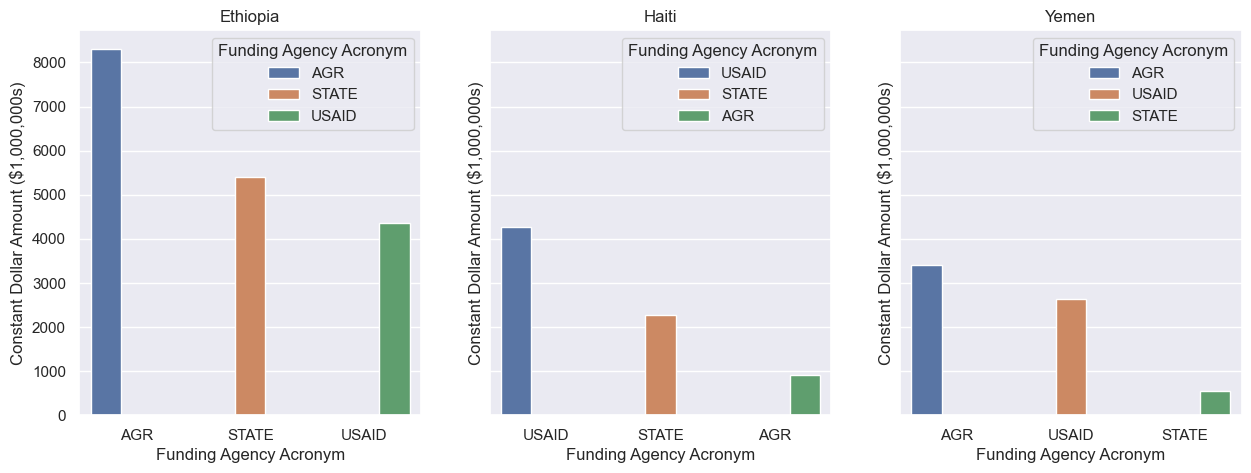

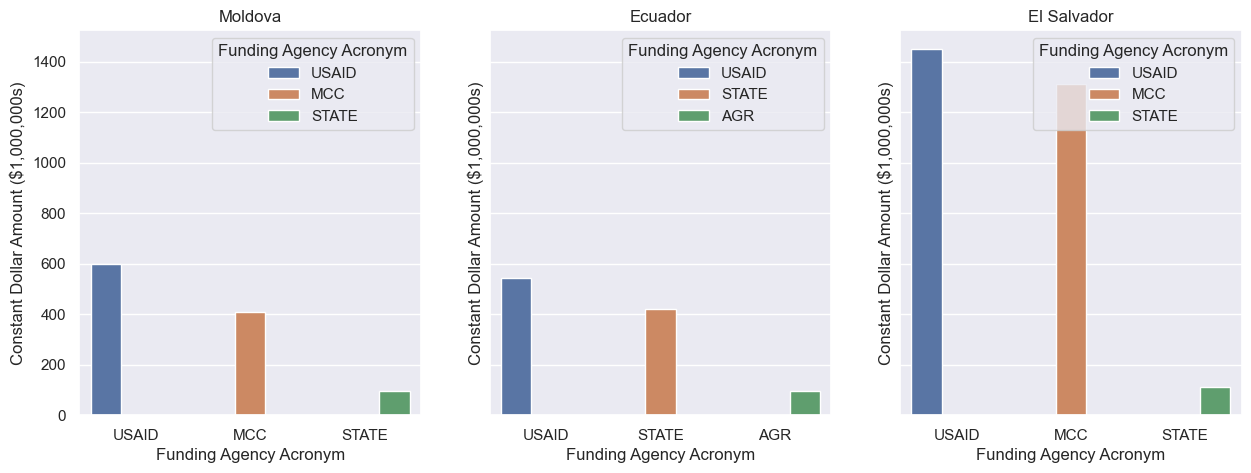

In [159]:
# Plotting the top 3 agencies by money spent
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey= True)


sns.barplot(data= country_by_funding_agency[0] , x= 'Funding Agency Acronym', y= 'Constant Dollar Amount ($1,000,000s)', hue= 'Funding Agency Acronym' , ax= axes[0]).set_title('Ethiopia')
sns.barplot(data= country_by_funding_agency[5] , x= 'Funding Agency Acronym', y= 'Constant Dollar Amount ($1,000,000s)', hue= 'Funding Agency Acronym' , ax= axes[1]).set_title('Haiti')
sns.barplot(data= country_by_funding_agency[2] , x= 'Funding Agency Acronym', y= 'Constant Dollar Amount ($1,000,000s)', hue= 'Funding Agency Acronym' , ax= axes[2]).set_title('Yemen')


fig1, axes1 = plt.subplots(1, 3, figsize=(15,5), sharey= True)
sns.barplot(data= country_by_funding_agency[1] , x= 'Funding Agency Acronym', y= 'Constant Dollar Amount ($1,000,000s)', hue= 'Funding Agency Acronym' ,ax= axes1[0]).set_title('Moldova')
sns.barplot(data= country_by_funding_agency[3] , x= 'Funding Agency Acronym', y= 'Constant Dollar Amount ($1,000,000s)', hue= 'Funding Agency Acronym' ,ax= axes1[1]).set_title('Ecuador')
sns.barplot(data= country_by_funding_agency[4] , x= 'Funding Agency Acronym', y= 'Constant Dollar Amount ($1,000,000s)', hue= 'Funding Agency Acronym' ,ax= axes1[2]).set_title('El Salvador')


Graph 2: Constant Dollar Amount in millions vs Funding Agency. The countries are separated in groups of 3 for scale purposes.
#### Analysis of Aid per Agency
There are four main contributors to non-military 

### Health Data (WHO GW13 Dataset)